In [497]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

In [498]:
PATH_CODED_IDS_TRAIN = "data/users/coded_ids_labels_train.csv"
PATH_CODED_IDS_TEST = "data/users/coded_ids_labels_test.csv"
PATH_FEATURES = "data/users_features/features.csv"
PATH_CODED = "data/users/coded_ids.csv"

In [499]:
test_users = pd.read_csv(PATH_CODED_IDS_TEST)
coded_ids = pd.read_csv(PATH_CODED)
train_users = pd.read_csv(PATH_CODED_IDS_TRAIN)
features = pd.read_csv(PATH_FEATURES)
print("number of elements in train : " , len(train_users))

number of elements in train :  686


In [500]:
spam_counter = 0
legit_counter = 0
train_len = len(train_users)
for i in train_users[:]['label']:
    if i == 1:
        spam_counter += 1
    else:
        legit_counter += 1
print(spam_counter)
print(legit_counter)

118
568


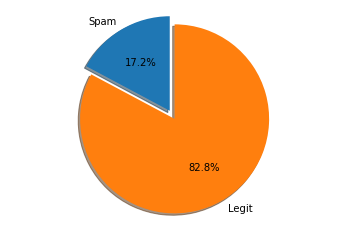

In [501]:
labels = 'Spam', 'Legit'
pie_sizes = [100 / train_len * spam_counter, 100 / train_len * legit_counter]
fig1, ax1 = plt.subplots()
ax1.pie(pie_sizes, explode=(0.1, 0), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [502]:
features = pd.merge(features, coded_ids, on='user_id')
features = pd.merge(features, train_users, on='coded_id')

In [503]:
# print(features.dtypes.to_string(max_rows=10000))
(value_nan, features_nan) = np.where(pd.isnull(features))
features_nan = list(dict.fromkeys(features_nan))

print("columns with NaN deleted : ", list(features.columns[features_nan]))

# print(features_nan)
features = features.drop(list(features.columns[features_nan]), axis=1)

columns with NaN deleted :  ['spam_in_screen_name', 'time_zone', 'utc_offset']


number of features :  137
number of object type features :  0


d:\python\3.9.1\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

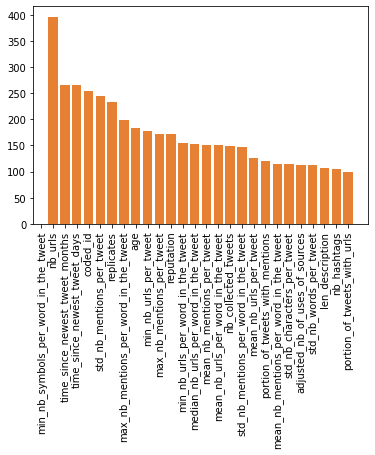

In [504]:

features = features.select_dtypes(exclude=[object])
print('number of features : ', len(features.columns))
print('number of object type features : ', len(features.dtypes[features.dtypes == object]))

features = features.apply(pd.to_numeric).astype('float64')

kb = SelectKBest(score_func=f_regression, k=10)
kb.fit(features.loc[:, features.columns != 'label'], features.label)
indices = np.argsort(kb.scores_)[::-1]
selected_features = []
for i in range(30):
  selected_features.append(features.columns[indices[i]])
plt.figure()
plt.bar(selected_features, kb.scores_[indices[range(30)]], color=(0.9,0.5,0.2), align='center')
plt.xticks(rotation=90)

In [505]:
# features = features.select_dtypes(exclude=[object,float, bool])
# features.user_id